In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('dados_gerais_04_11_2023.csv',index_col=[0])

In [7]:
df.shape

(352, 247)

In [8]:
#df_workers['company_size'].value_counts(normalize=True)

# RoadMap

- Segmentação dos dados
    - 1. Recorte do dataset original para pesquisadores e não trabalhadores [Por medida]
    - 2. Recorte das avaliações de cada grupo [Por medida]
    - 3. Recorte do dataset original para pesquisadores e não trabalhadores [Por critérios]
    - 4. Recorte das avaliações de cada grupo [Por critérios]    
- Criação de Radarcharts para:
    - Avaliação pela soma
    - Avaliação pela proporção de 4's e 5's
    - Avaliação pela agregação dos critérios nos 4 subgrupos

In [9]:
df_workers = df[df['What is your segment of acting?']!='Academia/Research Institution']

In [10]:
df_workers.shape

(194, 247)

In [11]:
df_academy = df[df['What is your segment of acting?']=='Academia/Research Institution']

In [12]:
df_academy.shape

(158, 247)

In [13]:
df_academy.head(2)

,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M1.8,M1.9,M1.10,...,M24.8,M24.9,M24.10,Local,Do you act directly with the circular economy?,Self knowledge about circular economy,What is your segment of acting?,What sector does your organization operate in?,company_size,How do you describe your position in your organization?
0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,3.0,UK,1,4.0,Academia/Research Institution,Quinary Sector,Grande,senior researcher
1,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,4.0,Brazil,1,4.0,Academia/Research Institution,Quinary Sector,Grande,Staff


### Separação - Medidas para Workers

In [14]:
import numpy as np
lista = np.arange(0,24)

In [15]:
lista

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
workers_medidas={}

In [17]:
for i in lista:
    workers_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    workers_medidas[i] = pd.DataFrame(df_workers.iloc[:,i*10:(i+1)*10])

### Separação - Medidas para Academy

In [18]:
academy_medidas = {}

In [19]:
for i in lista:
    academy_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    academy_medidas[i] = pd.DataFrame(df_academy.iloc[:,i*10:(i+1)*10])

### Separação - Critérios para Workers

In [20]:
lista2 = np.arange(1,11)

In [21]:
workers_criterios={}
for i in lista2:
    workers_criterios[i] = pd.DataFrame()

In [22]:
for i in lista2:
    workers_criterios[i]=df_workers.iloc[:,i-1:240:10]

In [23]:
workers_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
2,4.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0,4.0,...,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0
4,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0
5,3.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,4.0,...,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,4.0
6,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,...,2.0,2.0,4.0,3.0,3.0,1.0,2.0,2.0,4.0,3.0
7,3.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Separação - Critérios para Academy

In [24]:
lista2 = np.arange(1,11)

In [25]:
academy_criterios={}
for i in lista2:
    academy_criterios[i] = pd.DataFrame()

In [26]:
for i in lista2:
    academy_criterios[i]=df_academy.iloc[:,i-1:240:10]

In [27]:
academy_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4.0,4.0,5.0,5.0,4.0,4.0,2.0,2.0,4.0,4.0,...,3.0,2.0,2.0,4.0,4.0,4.0,5.0,4.0,2.0,4.0
8,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9,3.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0


### Testando normalidade

In [28]:
from scipy import stats

In [29]:
for coluna in df:
    df[coluna].fillna(df[coluna].mode()[0],inplace=True)

In [30]:
for coluna in df.iloc[:,:-7]:
    df[coluna] = df[coluna].astype(int)

In [31]:
df.iloc[:,:-7].values.reshape(-1)

array([4, 4, 3, ..., 2, 2, 5])

In [32]:
x=df.iloc[:,:-7].values.reshape(-1)

In [33]:
stats.shapiro(x).statistic

C:\Users\ednae\miniconda3\envs\msc\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9095255732536316

Os dados não seguem uma normal

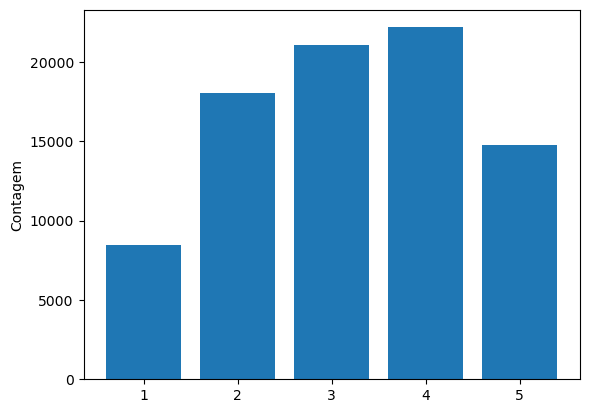

In [34]:
labels, counts = np.unique(x, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.ylabel('Contagem')
plt.show()

## Testes Pareados

- Para análise entre diferentes medidas para mesmos respondentes

1. Quais medidas possuem maiores medianas?

In [35]:
academy_medidas_medianas = pd.DataFrame()

cont=1
for i in academy_medidas:
    academy_medidas_medianas[cont] = academy_medidas[i].median(axis=1)
    cont+=1

##########

workers_medidas_medianas = pd.DataFrame()

cont=1
for i in workers_medidas:
    workers_medidas_medianas[cont] = workers_medidas[i].median(axis=1)
    cont+=1

In [96]:
workers_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2,4.0,4.0,3.0,4.0,3.0,5.0,4.5,4.0,4.5,3.0,...,4.0,4.0,4.5,5.0,4.5,3.5,4.0,5.0,5.0,4.0
4,3.0,3.0,3.0,4.5,2.5,2.0,3.0,3.0,3.0,2.0,...,3.5,4.0,4.0,3.0,3.0,3.5,3.0,3.0,3.0,3.0


In [37]:
academy_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,3.0,3.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### Academy_wilcox

In [38]:
from scipy.stats import wilcoxon
res = wilcoxon(academy_medidas_medianas[1].values,y=academy_medidas_medianas[2].values,alternative='greater')

In [39]:
res[1]

0.9980880052855329

In [40]:
np.zeros((24,24)).shape

(24, 24)

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_linha > mediana_coluna`

In [41]:
academy_wilcox = pd.DataFrame(np.zeros((24,24)))

In [42]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            academy_wilcox.loc[linha-1,coluna-1] = wilcoxon(academy_medidas_medianas[linha].values,y=academy_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            academy_wilcox.loc[linha,coluna] = 1

In [43]:
academy_wilcox = academy_wilcox.iloc[:-1,:-1]

In [108]:
academy_medidas_medianas[8].isna().sum()

1

C:\Users\ednae\AppData\Local\Temp\ipykernel_988\979352534.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

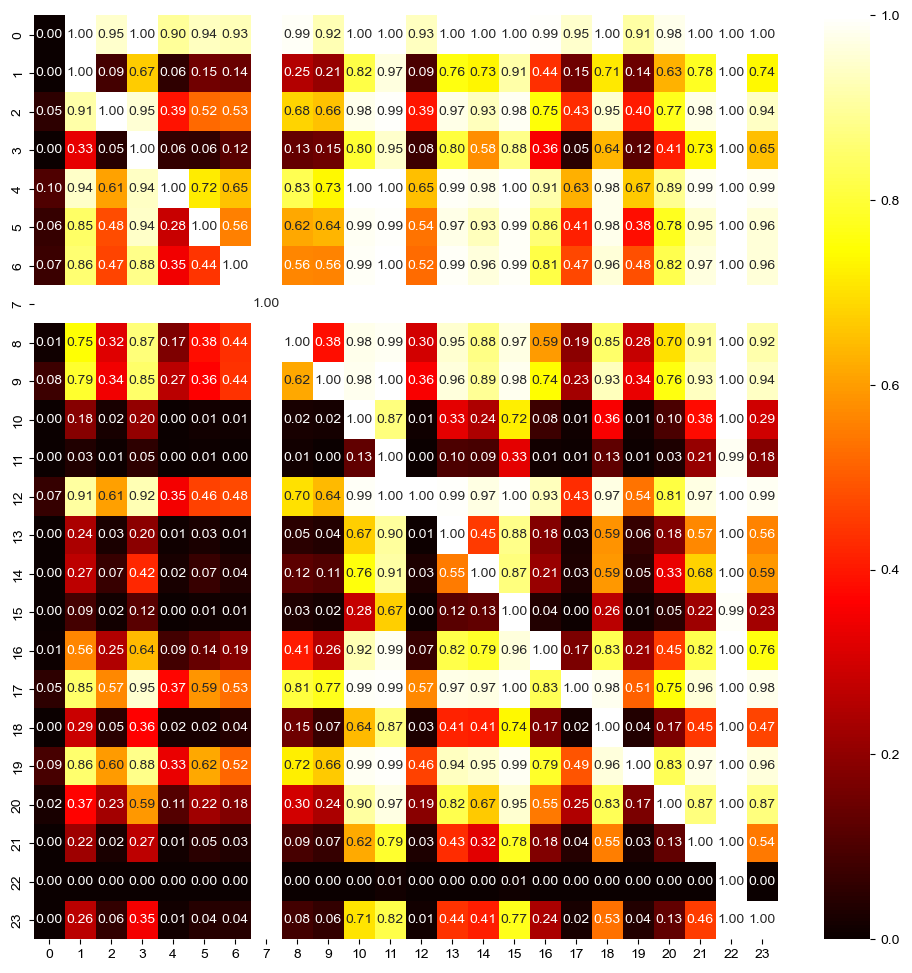

In [102]:
import seaborn as sns
fig=plt.figure()
plt.figure(figsize=(12,12))
sns.heatmap(academy_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)
fig.show()

In [105]:
plt.savefig('wilcox1.pdf',format='pdf')

<Figure size 640x480 with 0 Axes>

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

### Workes_wilcox

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_linha > mediana_coluna`

In [45]:
workers_wilcox = pd.DataFrame(np.zeros((24,24)))

In [46]:
workers_medidas_medianas.isna().sum()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
dtype: int64

In [47]:
for colunas in workers_medidas_medianas:
    num = workers_medidas_medianas[colunas].mode()
    num = float(num)
    workers_medidas_medianas[colunas].fillna(num,inplace=True)

In [48]:
workers_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2,4.0,4.0,3.0,4.0,3.0,5.0,4.5,4.0,4.5,3.0,...,4.0,4.0,4.5,5.0,4.5,3.5,4.0,5.0,5.0,4.0
4,3.0,3.0,3.0,4.5,2.5,2.0,3.0,3.0,3.0,2.0,...,3.5,4.0,4.0,3.0,3.0,3.5,3.0,3.0,3.0,3.0


In [49]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            workers_wilcox.loc[linha-1,coluna-1] = wilcoxon(workers_medidas_medianas[linha].values,y=workers_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            workers_wilcox.loc[linha,coluna] = 1.0

In [50]:
workers_wilcox = workers_wilcox.iloc[:-1,:-1]

In [51]:
workers_wilcox

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.995151,3.082521e-02,0.999995,0.374352,0.614829,0.867529,0.992638,0.406874,0.865773,...,0.999345,0.974841,0.891879,0.586306,0.469757,0.770843,0.942979,0.999869,0.999613,0.999347
1,0.004849,1.000000,3.743940e-07,0.971548,0.000550,0.032416,0.205850,0.476159,0.017322,0.122412,...,0.842629,0.285356,0.158122,0.023116,0.037163,0.058445,0.202893,0.846566,0.874585,0.759907
2,0.969175,1.000000,1.000000e+00,1.000000,0.973480,0.986611,0.999609,0.999999,0.982080,0.998662,...,1.000000,0.999976,0.999589,0.979297,0.965481,0.995122,0.999922,1.000000,0.999999,0.999999
3,0.000005,0.028452,1.835099e-10,1.000000,0.000005,0.000596,0.005276,0.023251,0.000001,0.001216,...,0.216445,0.006617,0.005931,0.000048,0.000087,0.000396,0.003717,0.175746,0.244371,0.163856
4,0.625648,0.999450,2.651998e-02,0.999995,1.000000,0.814646,0.949384,0.995613,0.696923,0.946249,...,0.999896,0.984355,0.933177,0.662095,0.641922,0.875529,0.982002,0.999951,0.999264,0.999600
5,0.385171,0.967584,1.338861e-02,0.999404,0.185354,1.000000,0.856534,0.966774,0.384993,0.819962,...,0.995509,0.915084,0.858846,0.389649,0.386361,0.551907,0.824849,0.995457,0.993535,0.994191
6,0.132471,0.794150,3.914315e-04,0.994724,0.050616,0.143466,1.000000,0.785748,0.037358,0.547902,...,0.983369,0.672543,0.664077,0.060793,0.119441,0.246392,0.617690,0.951554,0.977719,0.974749
7,0.007362,0.523841,1.027046e-06,0.976749,0.004387,0.033226,0.214252,1.000000,0.008335,0.115786,...,0.882904,0.460969,0.270272,0.044645,0.037941,0.118867,0.236635,0.875156,0.929167,0.854322
8,0.593126,0.982678,1.792046e-02,0.999999,0.303077,0.615007,0.962642,0.991665,1.000000,0.912890,...,0.999838,0.978478,0.959065,0.503919,0.651840,0.673713,0.916257,0.999372,0.999838,0.999786
9,0.134227,0.877588,1.337681e-03,0.998784,0.053751,0.180038,0.452098,0.884214,0.087110,1.000000,...,0.992871,0.773400,0.616030,0.082961,0.200421,0.226137,0.520661,0.983419,0.977720,0.974440


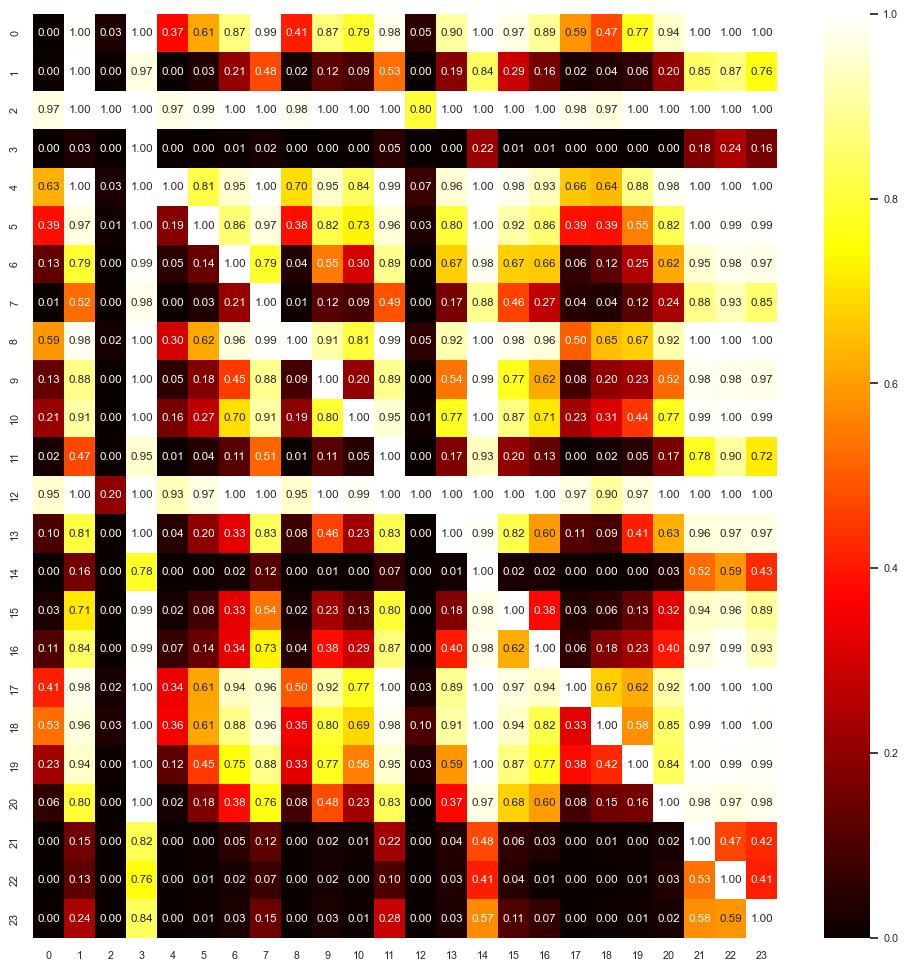

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(workers_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

## Testes não pareados - Para grupos distintos

- Academics vs Professionals

### Gráficos

In [66]:
print(df_workers['Self knowledge about circular economy'].value_counts(normalize=True))
print(df_academy['Self knowledge about circular economy'].value_counts(normalize=True))

4.0    0.689119
3.0    0.227979
2.0    0.067358
5.0    0.010363
1.0    0.005181
Name: Self knowledge about circular economy, dtype: float64
4.0    0.575949
3.0    0.265823
2.0    0.107595
5.0    0.037975
1.0    0.012658
Name: Self knowledge about circular economy, dtype: float64


In [71]:
for i in range(df_workers.shape[0]):
    pct = (df_workers['Self knowledge about circular economy'][i] / total_runs) * 100
    percentage.append(round(pct, 2))

KeyError: 0

In [92]:
figure

(array([  1.,   0.,  13.,   0.,   0.,  44.,   0., 133.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

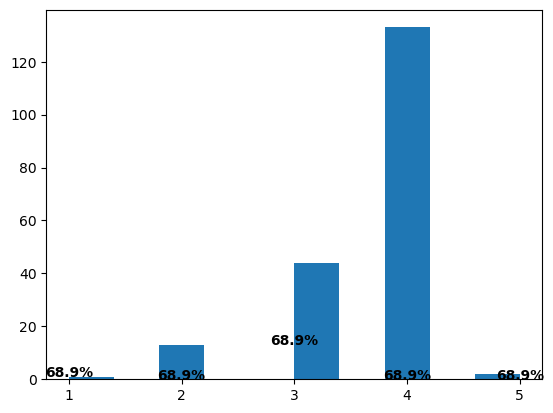

In [94]:
figure = plt.hist(x=df_workers['Self knowledge about circular economy'])
plt.xticks(np.arange(1,6,1))
for i in range (0,5):
    plt.text(i+1,
             figure[0][i]*1.01,
             '68.9'+'%',
             ha='center',
             weight='bold')
plt.show()

([<matplotlib.axis.XTick at 0x1cf8d2061d0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

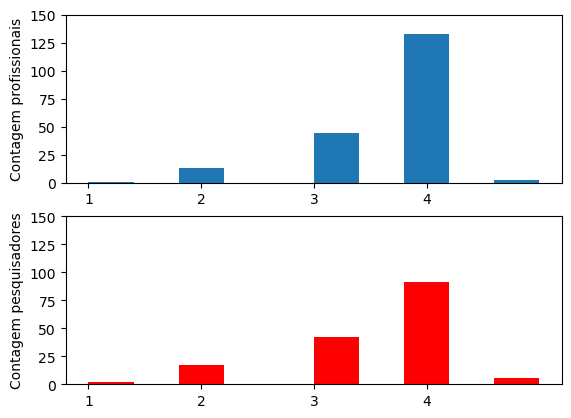

In [69]:
from matplotlib import pyplot as plt

plt.style.use('default')

plt.subplot(2, 1, 1)
plt.hist(x=df_workers['Self knowledge about circular economy'])#, y=df.index)
plt.ylabel('Contagem profissionais')
plt.ylim((0,150))
plt.xticks(np.arange(1,5,1))

plt.subplot(2, 1, 2)
plt.hist(x=df_academy['Self knowledge about circular economy'], color='red')
plt.ylabel('Contagem pesquisadores')
plt.ylim((0,150))
plt.xticks(np.arange(1,5,1))

### Radarcharts

In [54]:
academy_criterios[2].median()

M1.2     4.0
M2.2     4.0
M3.2     4.0
M4.2     4.0
M5.2     4.0
M6.2     4.0
M7.2     4.0
M8.2     4.0
M9.2     4.0
M10.2    4.0
M11.2    4.0
M12.2    4.0
M13.2    4.0
M14.2    4.0
M15.2    4.0
M16.2    4.0
M17.2    4.0
M18.2    4.0
M19.2    4.0
M20.2    4.0
M21.2    4.0
M22.2    4.0
M23.2    4.0
M24.2    4.0
dtype: float64